Berner Fachhochschule BFH - MAS Data Science - Graph Machine Learning - Master Thesis FS/2022 Thomas Iten

# Experiment 2 - Similarity Scenario B

**Referenzen**<br />
[1] https://networkx.org/documentation/stable/reference/algorithms/link_prediction.html<br />
[2] Stamile, Marzullo, Deusebio. Graph Machine Learning. Packt Publishing 2021. ISBN 978-1-80020-449-2



In [1]:
from gml.graph.graph_link import GraphLink, Algorithm
from gml.graph.graph_viz import GraphViz
from gml.graph.data_factory import DataFactory, EdgeLabelFactory

## 2.1 Data Structure
### Datensammlung - Mitarbeiter

<img src="img/test-scenario2.png" alt="Test Scenario 2" width="800"/>

## 2.2 Exploration

### Create graph and link predictions for all missing edges

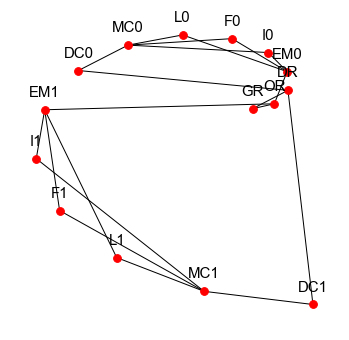

Link Predictions:
          Edge    CN  PA        JC        AA
0    (GR, EM0)  2.30   8  0.200000  0.910239
1     (GR, I0)  1.00   4  0.000000  0.000000
2     (GR, F0)  1.00   4  0.000000  0.000000
3     (GR, L0)  1.00   4  0.000000  0.000000
4    (GR, MC0)  1.00   8  0.000000  0.000000
5    (GR, DC0)  2.30   4  0.333333  0.910239
6    (GR, EM1)  2.30   8  0.200000  0.910239
7     (GR, I1)  1.00   4  0.000000  0.000000
8     (GR, F1)  1.00   4  0.000000  0.000000
9     (GR, L1)  1.00   4  0.000000  0.000000
10   (GR, MC1)  1.00   8  0.000000  0.000000
11   (GR, DC1)  2.30   4  0.333333  0.910239
12    (OR, DR)  2.30   9  0.200000  1.442695
13    (OR, I0)  2.30   6  0.250000  0.721348
14    (OR, F0)  2.30   6  0.250000  0.721348
15    (OR, L0)  2.30   6  0.250000  0.721348
16   (OR, MC0)  1.00  12  0.000000  0.000000
17   (OR, DC0)  1.00   6  0.000000  0.000000
18    (OR, I1)  2.30   6  0.250000  0.721348
19    (OR, F1)  2.30   6  0.250000  0.721348
20    (OR, L1)  2.30   6  0.250000  0

In [2]:
graph = DataFactory().create_graph(n=2, connected=True, add_dc=True)
graph.draw(layout=GraphViz.SPIRAL_LAYOUT)

possible_edges = graph.missing_edges()

gl = GraphLink(graph, possible_edges)\
    .predict(Algorithm.COMMON_NEIGHBOR_CENTRALITY)\
    .predict(Algorithm.PREFERENTIAL_ATTACHMENT)\
    .predict(Algorithm.JACCARD_COEFFICIENT)\
    .predict(Algorithm.ADAMIC_ADAR_INDEX)

gl.print_results(title="Link Predictions:")

### Normalize results, filter edges of interest, label results and show metrics

In [3]:
gl.normalize()
gl.filter([("EM0","DC0"),("EM0", "DC1"),("EM1","DC0"),("EM1", "DC1")])

gl.print_results(title="Predictions normalized:", incl_legend=False)
print()

gl.label(threshold=0.8)
gl.print_results(title="Prediction labels with threshold 0.8:", incl_legend=False)
print()

y_true = [1,0,0,1]
gl.print_metrics(y_true, title="Metrics:")

Predictions normalized:
         Edge        CN   PA   JC   AA
0  (EM0, DC0)  0.256410  0.5  0.0  0.0
1  (EM0, DC1)  0.192308  0.5  0.0  0.0
2  (EM1, DC0)  0.192308  0.5  0.0  0.0
3  (EM1, DC1)  0.256410  0.5  0.0  0.0

Prediction labels with threshold 0.8:
         Edge  CN  PA  JC  AA
0  (EM0, DC0)   0   0   0   0
1  (EM0, DC1)   0   0   0   0
2  (EM1, DC0)   0   0   0   0
3  (EM1, DC1)   0   0   0   0

Metrics:
      Metric   CN   PA   JC   AA
0  Precision  0.0  0.0  0.0  0.0
1     Recall  0.0  0.0  0.0  0.0
2   F1-Score  0.0  0.0  0.0  0.0

Legend:
  CN  = Common Neighbor Centrality
  PA  = Preferential Attachment
  JC  = Jaccard Coefficient
  AA  = Adamic Adar Index


## 2.3 Tests

### Create link predictions and show metrics for edge samples of interest


In [4]:
n = 100
graph = DataFactory().create_graph(n=n, connected=True, add_dc=True)

edges, labels = EdgeLabelFactory().sample("DC", "EM", n, p=0.1, shuffle=True)

gl = GraphLink(graph, edges)\
    .predict(Algorithm.COMMON_NEIGHBOR_CENTRALITY)\
    .predict(Algorithm.PREFERENTIAL_ATTACHMENT)\
    .predict(Algorithm.JACCARD_COEFFICIENT)\
    .predict(Algorithm.ADAMIC_ADAR_INDEX)

gl.normalize()
gl.label(threshold=0.8)
gl.print_metrics(labels)

Metrics
      Metric   CN        PA   JC   AA
0  Precision  1.0  0.500000  0.0  0.0
1     Recall  1.0  1.000000  0.0  0.0
2   F1-Score  1.0  0.666667  0.0  0.0

Legend:
  CN  = Common Neighbor Centrality
  PA  = Preferential Attachment
  JC  = Jaccard Coefficient
  AA  = Adamic Adar Index


### Create link predcitions for all possible edges first and then show metrics for edge samples of interest

In [5]:
n = 100
graph = DataFactory().create_graph(n=n, connected=True, add_dc=True)

possible_edges = graph.missing_edges()

gl = GraphLink(graph, possible_edges)\
    .predict(Algorithm.COMMON_NEIGHBOR_CENTRALITY)\
    .predict(Algorithm.PREFERENTIAL_ATTACHMENT)\
    .predict(Algorithm.JACCARD_COEFFICIENT)\
    .predict(Algorithm.ADAMIC_ADAR_INDEX)

gl.normalize()

edges, labels = EdgeLabelFactory().sample("DC", "EM", n, p=0.1, shuffle=True)
gl.filter(edges)

gl.label(threshold=0.8)
gl.print_metrics(labels)

Metrics
      Metric   CN   PA   JC   AA
0  Precision  0.0  0.0  0.0  0.0
1     Recall  0.0  0.0  0.0  0.0
2   F1-Score  0.0  0.0  0.0  0.0

Legend:
  CN  = Common Neighbor Centrality
  PA  = Preferential Attachment
  JC  = Jaccard Coefficient
  AA  = Adamic Adar Index


---
_The end._